### Atividade processamento de audio

* Objetivo: consolidar conhecimentos de dados não estruturados para  áudio
* Escolha uma base de dados de áudio 
  1. Sugestões
    * [Urbansound](https://urbansounddataset.weebly.com/urbansound8k.html)
    * [Classificação de generos musicais](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)
    
OBS. Caso deseje, o aluno pode escolher outra base de dados de áudio, desde que seja de classificação

* Escolha duas amostras da base de dados escolhida e plote o espectograma. Para cada amostra plote o sinal e fale um pouco sobre suas características (amplitude, tempo total, taxa de amostragem)
* Gere um espectograma ou espectograma na escala MEL destas duas amostras, o que você observa?
* Extraia características do sinal utilizando a biblioteca librosa. Dentre as características, sugere-se que o aluno escolha algumas das features listadas abaixo: (não precisa trabalhar com todas)

| Feature            | Descricao                                                                                                                                                                |
|--------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Zero Crossing Rate | A taxa de mudanças do sinal durante a duração de um determinado quadro.                                                                                                  |
| Energy             | A soma dos quadrados dos valores do sinal, normalizados pelo respectivo comprimento do quadro.                                                                           |
| Entropy of Energy  | A entropia das energias normalizadas dos subquadros. Pode ser interpretado como uma medida de mudanças abruptas                                                          |
| Spectral Centroid  | O centro de gravidade do espectro.                                                                                                                                       |
| Spectral Spread    | O segundo momento central do espectro.                                                                                                                                   |
| Spectral Entropy   | Entropia das energias espectrais normalizadas para um conjunto de subquadros                                                                                             |
| Spectral Flux      | A diferença quadrada entre as magnitudes normalizadas dos espectros dos dois quadros sucessivos.                                                                         |
| Spectral Rolloff   | A frequência abaixo da qual se concentra 90% da distribuição de magnitude do espectro.                                                                                   |
| MFCC               | Mel Frequency Cepstral Coefficients formam uma representação cepstral onde as bandas de frequência não são lineares, mas sim distribuídas de acordo com a escala mel.    |
| Chroma Vector      | Uma representação de 12 elementos da energia espectral onde as caixas representam as 12 classes de alturas iguais de música do tipo ocidental (espaçamento de semitons). |

* Treine um classificador utilizando como entrada as características do sinal extraídas anteriormente. Qual o desempenho deste classificador? (utilizar acurácia e outra métrica de escolha do aluno como F1 score, curva ROC, sensibilidade e especificidade)
* Bônus: ao invés de trabalhar com as features extraídas, poderíamos treinar um modelo colocando como entrada apenas imagens do espectograma? Treine o mesmo classificador para este caso e compare os resultados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
header = 'filename chroma_vector spectral_centroid rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
with open('/content/drive/MyDrive/data_sets/audio/dataset.csv', 'w', newline = '') as file:
  writer = csv.writer(file)
  writer.writerow(header)
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [ ]:
for g in genres:
  for filename in os.listdir(f'/content/drive/MyDrive/data_sets/audio/audio_data/genres_original/{g}'):
    if '.wav' in filename:
      try:
        y, sr = librosa.load(f'/content/drive/MyDrive/data_sets/audio/audio_data/genres_original/{g}/{filename}')
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.median(chroma_stft)} {np.median(spec_cent)} {np.median(rolloff)} {np.median(zcr)}'  

        for e in mfcc:
          to_append += f' {np.median(e)}'
        to_append += f' {g}'

        file = open('/content/drive/MyDrive/data_sets/audio/dataset.csv', 'a', newline='')

        with file:
          writer = csv.writer(file)
          writer.writerow(to_append.split())
      except:
        print(f'arquivo_com_erro_{filename}')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


arquivo_com_erro_jazz.00054.wav


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_sets/audio/dataset.csv')
df.head()

,filename,chroma_vector,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00093.wav,0.283148,521.280630,861.328125,0.019531,-358.041229,171.059464,34.822983,17.660336,29.544872,...,1.808841,-6.050833,-5.392538,-0.074969,-1.434859,-3.181321,0.177107,2.568616,-1.719490,blues
1,blues.00087.wav,0.225924,1332.588799,2874.682617,0.042480,-154.172729,128.838745,2.322994,44.374374,2.933311,...,0.592879,-7.461854,0.287912,-8.303209,3.965227,-6.135601,0.698707,2.593741,-5.694216,blues
2,blues.00050.wav,0.331715,1939.487508,4166.674805,0.081055,-80.782112,105.466263,-23.585207,59.182335,-0.776491,...,12.563571,-10.068079,2.692457,-6.812072,2.935231,-8.575090,-0.164097,-2.744073,0.639652,blues
3,blues.00044.wav,0.308023,2245.351157,5178.735352,0.090820,-108.367950,87.304863,-8.675535,64.900803,-6.184230,...,11.161026,-5.280480,3.722568,-13.717876,11.910698,-0.402050,-1.215812,-5.366255,3.403340,blues
4,blues.00078.wav,0.343430,2320.460542,4974.169922,0.122559,-0.455115,101.068146,-34.047249,41.338867,-14.651708,...,12.307200,-13.756721,6.364107,-8.842218,4.990906,-11.246941,3.314200,-4.990691,-3.987996,blues


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            999 non-null    object 
 1   chroma_vector       999 non-null    float64
 2   spectral_centroid   999 non-null    float64
 3   rolloff             999 non-null    float64
 4   zero_crossing_rate  999 non-null    float64
 5   mfcc1               999 non-null    float64
 6   mfcc2               999 non-null    float64
 7   mfcc3               999 non-null    float64
 8   mfcc4               999 non-null    float64
 9   mfcc5               999 non-null    float64
 10  mfcc6               999 non-null    float64
 11  mfcc7               999 non-null    float64
 12  mfcc8               999 non-null    float64
 13  mfcc9               999 non-null    float64
 14  mfcc10              999 non-null    float64
 15  mfcc11              999 non-null    float64
 16  mfcc12  

In [ ]:
df.isnull().sum()

filename              0
chroma_vector         0
spectral_centroid     0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [ ]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: label, dtype: int64

In [ ]:
X = df.select_dtypes(include=np.number) #features
y = df['label'] # target

In [ ]:
# particionar os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic regression

In [ ]:

pipe_knn = Pipeline([('std', StandardScaler()), ('knn', KNeighborsClassifier())])

# ==========================================================


In [ ]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):
    
    # ============================================
    print('#'*80)
    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)
    y_probs_train = estimator.predict_proba(X_train)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))
    print('#'*80)

    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)
    y_probs_test = estimator.predict_proba(X_test)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))
    print('#'*80)

################################################################################

Métricas de avaliação de treino:


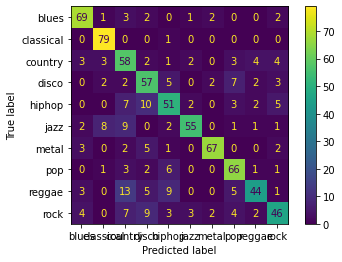

              precision    recall  f1-score   support

       blues       0.82      0.86      0.84        80
   classical       0.84      0.99      0.91        80
     country       0.56      0.72      0.63        80
       disco       0.62      0.71      0.66        80
      hiphop       0.65      0.64      0.64        80
        jazz       0.87      0.70      0.77        79
       metal       0.92      0.84      0.88        80
         pop       0.74      0.82      0.78        80
      reggae       0.79      0.55      0.65        80
        rock       0.71      0.57      0.63        80

    accuracy                           0.74       799
   macro avg       0.75      0.74      0.74       799
weighted avg       0.75      0.74      0.74       799

################################################################################

Métricas de avaliação de teste:


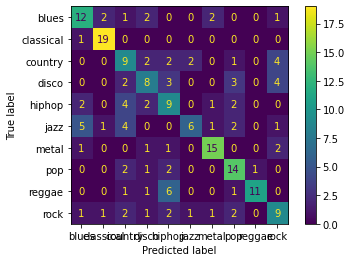

              precision    recall  f1-score   support

       blues       0.55      0.60      0.57        20
   classical       0.83      0.95      0.88        20
     country       0.36      0.45      0.40        20
       disco       0.44      0.40      0.42        20
      hiphop       0.36      0.45      0.40        20
        jazz       0.67      0.30      0.41        20
       metal       0.75      0.75      0.75        20
         pop       0.56      0.70      0.62        20
      reggae       0.92      0.55      0.69        20
        rock       0.43      0.45      0.44        20

    accuracy                           0.56       200
   macro avg       0.59      0.56      0.56       200
weighted avg       0.59      0.56      0.56       200

################################################################################


In [ ]:
metricas_classificacao(pipe_knn, X_train, X_test, y_train, y_test)